# `Interpolation and extrapolation in ML`

- **Extrapolation** is an estimation of a value based on extending a known sequence of values or facts beyond the area that is certainly known. In a general sense, to extrapolate is to infer something that is not explicitly stated from existing information.

- **Interpolation** is an estimation of a value within two known values in a sequence of values. Polynomial interpolation is a method of estimating values between known data points. When graphical data contains a gap, but data is available on either side of the gap or at a few specific points within the gap, interpolation allows us to estimate the values within the gap.


![](https://lh3.googleusercontent.com/proxy/t1asscECqXTFvybHep7NLiqLvZUxd8PmmR7rEVt_tKwW8pFR1JZ1s35DJXWjJKfJOJXnzJV14eeU4vcq4z0Tuxf0s1-Eto2PWCznRHwq9dJ46QNBVS9gOtyIUl65a_0kUgQvtIg3u2fh-XSg)

![](https://i.ytimg.com/vi/gbND5b0F8zc/maxresdefault.jpg)

## `How to draw a curve into the dataset`

Curve fitting is the process of constructing a curve, or mathematical function, that has the best fit to a series of data points, possibly subject to constraints. Curve fitting can involve either interpolation, where an exact fit to the data is required, or smoothing, in which a "smooth" function is constructed that approximately fits the data. A related topic is regression analysis, which focuses more on questions of statistical inference such as how much uncertainty is present in a curve that is fit to data observed with random errors. Fitted curves can be used as an aid for data visualization, to infer values of a function where no data are available, and to summarize the relationships among two or more variables. Extrapolation refers to the use of a fitted curve beyond the range of the observed data,and is subject to a degree of uncertainty since it may reflect the method used to construct the curve as much as it reflects the observed data.

![](https://mathleaks.com/mediawiki/images/6/6d/Basic_char_graph_of_polynomial_functions.svg)
![](https://miro.medium.com/max/772/1*Ck2VzHlizyEU5168zzFXyw.png)
![](https://i.stack.imgur.com/3qhBM.gif)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Curve_fitting.svg/1024px-Curve_fitting.svg.png)
- **Polynomial curves fitting points generated with a sine function**. The black dotted line is the "true" data, the **red line** is a **first degree** polynomial, the **green line** is **second degree**, the **orange line** is **third degree** and the **blue line** is **fourth degree**.

### Reference:

- [Curve fitting](https://en.wikipedia.org/wiki/Curve_fitting#:~:text=A%20line%20will%20connect%20any,points%20with%20distinct%20x%20coordinates.&text=This%20will%20exactly%20fit%20a%20simple%20curve%20to%20three%20points.&text=Angle%20and%20curvature%20constraints%20are,cases%20are%20called%20end%20conditions.)

## `Example 1`

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings   
warnings.filterwarnings('ignore')
sns.set_style(style="whitegrid")

In [16]:
data = pd.read_excel("polynomial_data.xlsx")

In [17]:
data

,X,Y
0,5,28
1,15,11
2,25,2
3,34,9
4,43,29
5,55,30


<AxesSubplot:xlabel='X', ylabel='Y'>

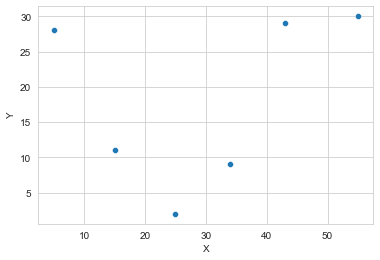

In [18]:
sns.scatterplot(data["X"],data["Y"])

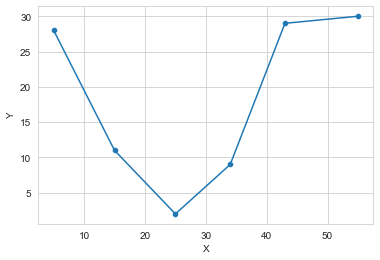

In [19]:
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],data["Y"])
plt.show()

In [20]:
X = data[["X"]]
y = data["Y"]

from sklearn.linear_model import LinearRegression

mdl = LinearRegression()
mdl.fit(X,y)

LinearRegression()

In [21]:
mdl.coef_

array([0.2034452])

In [22]:
mdl.intercept_

12.165033165033169

#### `y = 12.165033165033169 + 0.2034452 X (Polynomial equation with degree = 1)`

In [23]:
y_pred = mdl.predict(X)

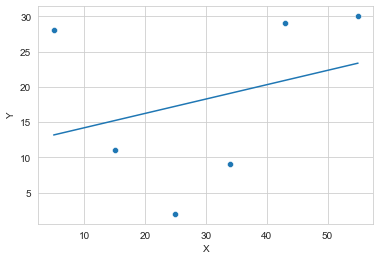

In [24]:
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred)
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
print(f"RMSE = {np.sqrt(mean_squared_error(y,y_pred))}")
print(f"R-squared = {r2_score(y,y_pred)}")

RMSE = 10.654837329849691
R-squared = 0.09280352787566992


## `Polynomial Regression -------------------------------------`

In [27]:
from sklearn.preprocessing import PolynomialFeatures

### `Degree 1 -----------`

In [28]:
poly_regf = PolynomialFeatures(degree=1)

In [29]:
poly_regf

PolynomialFeatures(degree=1)

### `Convert my X into polynomial features`

In [30]:
X_poly = poly_regf.fit_transform(X)

In [32]:
X_poly

array([[ 1.,  5.],
       [ 1., 15.],
       [ 1., 25.],
       [ 1., 34.],
       [ 1., 43.],
       [ 1., 55.]])

In [33]:
mdl_poly = LinearRegression()
mdl_poly.fit(X_poly,y)

LinearRegression()

In [34]:
mdl_poly.coef_

array([0.       , 0.2034452])

In [35]:
mdl_poly.intercept_

12.165033165033163

In [36]:
y_pred_poly = mdl_poly.predict(X_poly)

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
print(f"RMSE = {np.sqrt(mean_squared_error(y,y_pred_poly))}")
print(f"R-squared = {r2_score(y,y_pred_poly)}")

RMSE = 10.654837329849693
R-squared = 0.09280352787566959


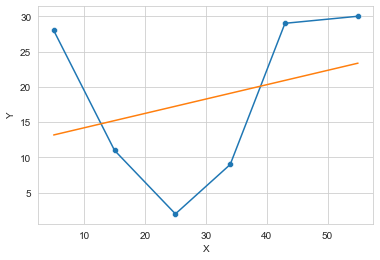

In [38]:
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred_poly)

plt.show()

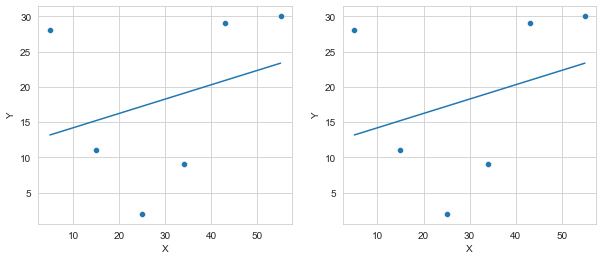

In [39]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred)

plt.subplot(1,2,2)
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred_poly)
plt.show()

### `Degree 2 ------------`

In [40]:
poly_regf = PolynomialFeatures(degree=2)

In [41]:
poly_regf

PolynomialFeatures()

In [42]:
X_poly = poly_regf.fit_transform(X)

In [43]:
X_poly

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.400e+01, 1.156e+03],
       [1.000e+00, 4.300e+01, 1.849e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [44]:
mdl_poly = LinearRegression()
mdl_poly.fit(X_poly,y)

LinearRegression()

In [45]:
mdl_poly.coef_

array([ 0.        , -1.84351385,  0.03425043])

In [46]:
mdl_poly.intercept_

33.133789522789584

In [47]:
y_pred_poly = mdl_poly.predict(X_poly)

In [48]:
from sklearn.metrics import mean_squared_error,r2_score
print(f"RMSE = {np.sqrt(mean_squared_error(y,y_pred_poly))}")
print(f"R-squared = {r2_score(y,y_pred_poly)}")

RMSE = 6.136922096521143
R-squared = 0.6990398975636624


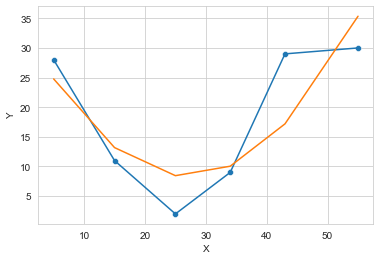

In [49]:
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred_poly)
plt.show()

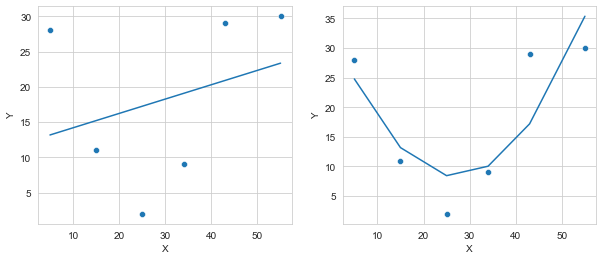

In [50]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred)

plt.subplot(1,2,2)
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred_poly)
plt.show()

### `Degree 3 -------------`

In [51]:
poly_regf = PolynomialFeatures(degree=3)

In [52]:
poly_regf

PolynomialFeatures(degree=3)

In [595]:
# poly_regf.fit(X)

In [54]:
#X_poly = poly_regf.transform(X)

In [597]:
# X_poly # x^0+x^1+x^2+x^3

### `fit & transform together`

In [55]:
X_poly = poly_regf.fit_transform(X)

### `x^0+x^1+x^2+x^3`

In [56]:
X_poly # x^0+x^1+x^2+x^3

array([[1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02],
       [1.00000e+00, 1.50000e+01, 2.25000e+02, 3.37500e+03],
       [1.00000e+00, 2.50000e+01, 6.25000e+02, 1.56250e+04],
       [1.00000e+00, 3.40000e+01, 1.15600e+03, 3.93040e+04],
       [1.00000e+00, 4.30000e+01, 1.84900e+03, 7.95070e+04],
       [1.00000e+00, 5.50000e+01, 3.02500e+03, 1.66375e+05]])

In [57]:
mdl_poly = LinearRegression()
mdl_poly.fit(X_poly,y)

LinearRegression()

In [58]:
mdl_poly.coef_

array([ 0.00000000e+00, -5.29094823e+00,  1.75068180e-01, -1.55748430e-03])

In [59]:
mdl_poly.intercept_

51.76860925828217

In [60]:
y_pred_poly = mdl_poly.predict(X_poly)

In [61]:
from sklearn.metrics import mean_squared_error,r2_score
print(f"RMSE = {np.sqrt(mean_squared_error(y,y_pred_poly))}")
print(f"R-squared = {r2_score(y,y_pred_poly)}")

RMSE = 3.423771112959535
R-squared = 0.906326412692186


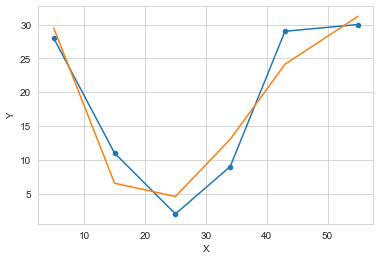

In [62]:
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred_poly)
plt.show()

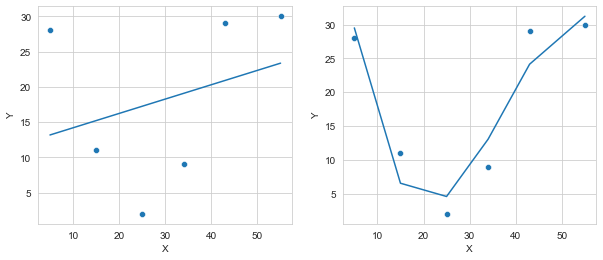

In [63]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred)

plt.subplot(1,2,2)
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred_poly)
plt.show()

## `Finding a best parameter (Grid search) ---------------------------------`

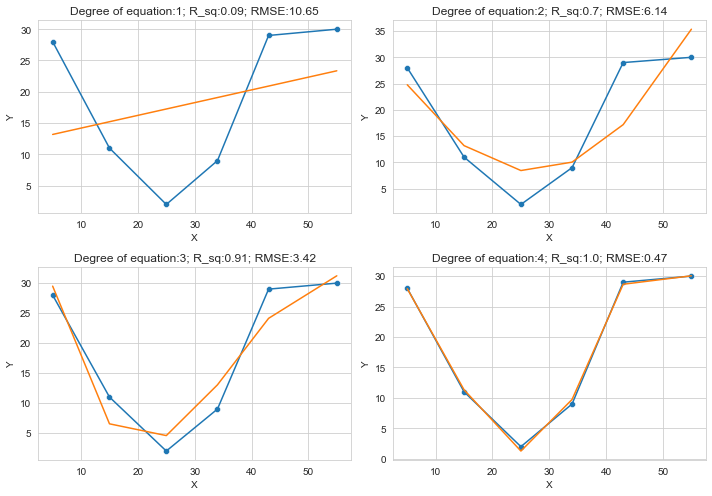

In [607]:
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(10,7))

for i in range(1,5):
    poly_regf = PolynomialFeatures(degree=i)
    X_poly = poly_regf.fit_transform(X)
    mdl_poly = LinearRegression()
    mdl_poly.fit(X_poly,y)
    y_pred_poly = mdl_poly.predict(X_poly)
    
    rmse = round(np.sqrt(mean_squared_error(y,y_pred_poly)),2)
    r2 = round(r2_score(y,y_pred_poly),2)
    
    
    plt.subplot(2,2,i)
    sns.scatterplot(data["X"],data["Y"])
    sns.lineplot(data["X"],data["Y"])
    sns.lineplot(data["X"],y_pred_poly)
    plt.title(f"Degree of equation:{i}; R_sq:{r2}; RMSE:{rmse}")
    
plt.tight_layout()
plt.show()

## `Regularization Techniques to reduce overfitting`

### `Lasso(L1)`

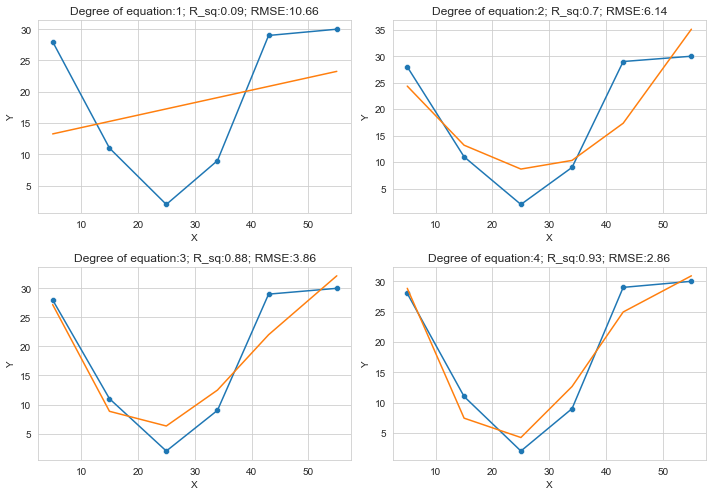

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,7))

for i in range(1,5):
    poly_regf = PolynomialFeatures(degree=i)
    X_poly = poly_regf.fit_transform(X)
    lasso_r = Lasso(alpha=1)
    lasso_r.fit(X_poly,y)
    y_pred_poly_lasso = lasso_r.predict(X_poly)
    
    rmse = round(np.sqrt(mean_squared_error(y,y_pred_poly_lasso)),2)
    r2 = round(r2_score(y,y_pred_poly_lasso),2)
    
    
    plt.subplot(2,2,i)
    sns.scatterplot(data["X"],data["Y"])
    sns.lineplot(data["X"],data["Y"])
    sns.lineplot(data["X"],y_pred_poly_lasso)
    plt.title(f"Degree of equation:{i}; R_sq:{r2}; RMSE:{rmse}")
    
plt.tight_layout()
plt.show()

### `Ridge(L2)`

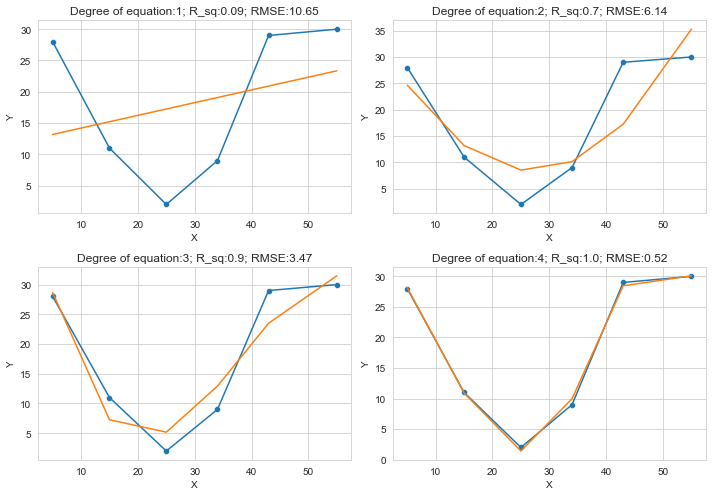

In [609]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

plt.figure(figsize=(10,7))

for i in range(1,5):
    poly_regf = PolynomialFeatures(degree=i)
    X_poly = poly_regf.fit_transform(X)
    ridge_r = Ridge(alpha=1)
    ridge_r.fit(X_poly,y)
    y_pred_poly_ridge = ridge_r.predict(X_poly)
    
    rmse = round(np.sqrt(mean_squared_error(y,y_pred_poly_ridge)),2)
    r2 = round(r2_score(y,y_pred_poly_ridge),2)
    
    
    plt.subplot(2,2,i)
    sns.scatterplot(data["X"],data["Y"])
    sns.lineplot(data["X"],data["Y"])
    sns.lineplot(data["X"],y_pred_poly_ridge)
    plt.title(f"Degree of equation:{i}; R_sq:{r2}; RMSE:{rmse}")
    
plt.tight_layout()
plt.show()

## Example 2. `Polynomial regression on BOSTON housing data`

In [87]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
boston_dataset = load_boston()

In [88]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [89]:
print(boston_dataset["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [90]:
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston["MEDV"] = boston_dataset.target

In [91]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

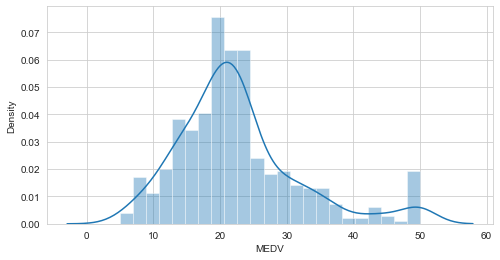

In [92]:
# Look at how the prices are distributed
plt.figure(figsize=(8,4))
sns.distplot(boston.MEDV)

### `Do not trust correlation alone, put charts to verify pattern`
### `It is the reason Data Scientist are paid so high`

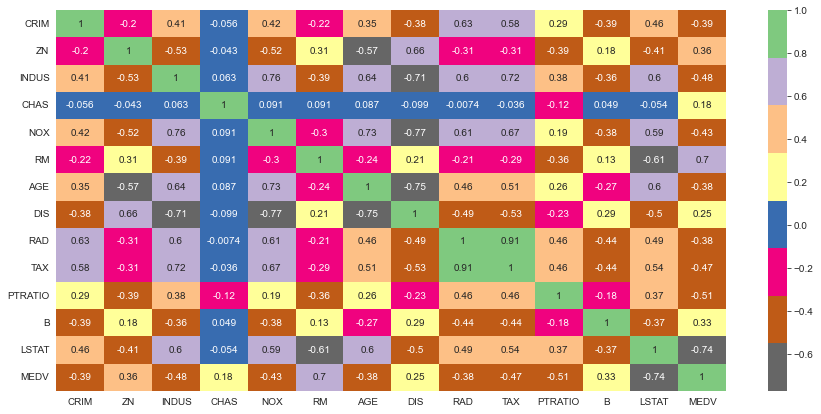

In [93]:
plt.figure(figsize=(15,7))
corr_mat = boston.corr()

sns.heatmap(corr_mat,annot=True,cmap='Accent_r')
plt.show()

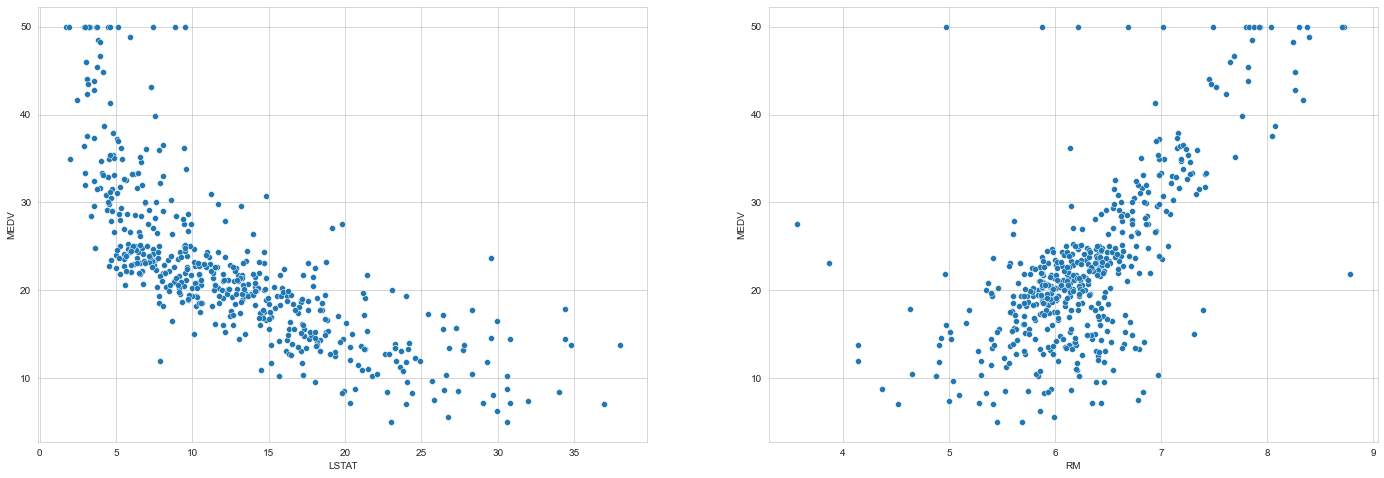

In [94]:
plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
sns.scatterplot(boston.LSTAT,boston.MEDV)

plt.subplot(1,2,2)
sns.scatterplot(boston.RM,boston.MEDV);

In [95]:
X = boston[["RM","LSTAT"]]
y = boston["MEDV"]

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=45)

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [101]:
print(f"Intercept:{lm.intercept_}")
print(f"coeff:{lm.coef_}")

Intercept:-0.4056443553174667
coeff:[ 4.92795043 -0.63979578]


### `Just checking stats through OLS --------------------`

In [79]:
import statsmodels.formula.api as smf
results = smf.ols("y_train~RM+LSTAT",data=X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     347.9
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           2.46e-88
Time:                        18:05:00   Log-Likelihood:                -1250.9
No. Observations:                 404   AIC:                             2508.
Df Residuals:                     401   BIC:                             2520.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4056      3.497     -0.116      0.908      -7.281       6.469
RM             4.9280      0.492     10.009      0.000       3.960       5.896
LSTAT         -0.6398      0.048    -13.320      0.000      -0.734      -0.545
==============================================================================
Omnibus:                      139.968   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.589
Skew:                           1.492   Prob(JB):                    6.84e-123
Kurtosis:                       7.951   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `Evaluation of model`

In [102]:
Y_train_pred = lm.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,Y_train_pred))
Rsqr_train = r2_score(y_train,Y_train_pred)

print('Evaluation metrics for Training Dataset')
print('-'*40)
print('RMSE is: ',rmse_train)
print('RSquared is: ',Rsqr_train*100)

print('\n')

Y_test_pred = lm.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,Y_test_pred))
Rsqr_test = r2_score(y_test,Y_test_pred)


print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: ',Rsqr_test*100)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  5.351976166303716
RSquared is:  63.43676895938572


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  6.165806324221945
RSquared is:  64.82431532229032


# `Polynomial Regression ----------------------------------`

In [103]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(degree,X_train, X_test, y_train, y_test):
    poly_regf = PolynomialFeatures(degree=degree)
    
    X_poly = poly_regf.fit_transform(X_train)
    
    mdl_poly = LinearRegression()
    mdl_poly.fit(X_poly,y_train)
    
   
    Y_train_pred = mdl_poly.predict(X_poly)
    rmse_train = np.sqrt(mean_squared_error(y_train,Y_train_pred))
    Rsqr_train = r2_score(y_train,Y_train_pred)

    print('Evaluation metrics for Training Dataset')
    print('-'*40)
    print('RMSE is: ',rmse_train)
    print('RSquared is: ',Rsqr_train*100)

    print('\n')
    
    X_test_poly = poly_regf.transform(X_test)
    Y_test_pred = mdl_poly.predict(X_test_poly)
    rmse_test =  np.sqrt(mean_squared_error(y_test,Y_test_pred))
    Rsqr_test = r2_score(y_test,Y_test_pred)


    print('Evaluation metrics for Testing Dataset')
    print('-'*40)
    print('RMSE is: ',rmse_test)
    print('RSquared is: ',Rsqr_test*100)

### `Degree 1`

In [104]:
polynomial_regression(1,X_train, X_test, y_train, y_test)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  5.351976166303716
RSquared is:  63.43676895938572


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  6.165806324221944
RSquared is:  64.82431532229033


### `Degree 2`

In [105]:
polynomial_regression(2,X_train, X_test, y_train, y_test)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  4.553196798789354
RSquared is:  73.53639113883203


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.5173307808457706
RSquared is:  81.11893064423379


### `Degree 3`

In [106]:
polynomial_regression(3,X_train, X_test, y_train, y_test)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  4.340525787742391
RSquared is:  75.95078489760057


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  5.902856318028501
RSquared is:  67.76057955363682


### `Degree 4`

In [107]:
polynomial_regression(4,X_train, X_test, y_train, y_test)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  4.166007039471063
RSquared is:  77.84579223961896


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  6.664041171485372
RSquared is:  58.90981043057859


### `Degree 5`

In [108]:
polynomial_regression(5,X_train, X_test, y_train, y_test)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  4.0459959098738265
RSquared is:  79.10381021162176


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  15.45379843624334
RSquared is:  -120.96998626369255


## `Degree 2 equation model is working best`

# `END ----------------------------------`